In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model

In [ ]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")


In [ ]:
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [ ]:
data = data.fillna(method="ffill")


In [ ]:

print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35177
Unique tags in corpus: 17


In [ ]:
words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())

In [ ]:
print("Unique tags are:", tags)


Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


In [ ]:

num_words = len(words)
num_tags = len(tags)

In [ ]:
num_words


35178

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:

getter = SentenceGetter(data)
sentences = getter.sentences

In [ ]:
len(sentences)


47959

In [ ]:
sentences[0]


[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{'Thousands': 1,
 'of': 2,
 'demonstrators': 3,
 'have': 4,
 'marched': 5,
 'through': 6,
 'London': 7,
 'to': 8,
 'protest': 9,
 'the': 10,
 'war': 11,
 'in': 12,
 'Iraq': 13,
 'and': 14,
 'demand': 15,
 'withdrawal': 16,
 'British': 17,
 'troops': 18,
 'from': 19,
 'that': 20,
 'country': 21,
 '.': 22,
 'Families': 23,
 'soldiers': 24,
 'killed': 25,
 'conflict': 26,
 'joined': 27,
 'protesters': 28,
 'who': 29,
 'carried': 30,
 'banners': 31,
 'with': 32,
 'such': 33,
 'slogans': 34,
 'as': 35,
 '"': 36,
 'Bush': 37,
 'Number': 38,
 'One': 39,
 'Terrorist': 40,
 'Stop': 41,
 'Bombings': 42,
 'They': 43,
 'Houses': 44,
 'Parliament': 45,
 'a': 46,
 'rally': 47,
 'Hyde': 48,
 'Park': 49,
 'Police': 50,
 'put': 51,
 'number': 52,
 'marchers': 53,
 'at': 54,
 '10,000': 55,
 'while': 56,
 'organizers': 57,
 'claimed': 58,
 'it': 59,
 'was': 60,
 '1,00,000': 61,
 'The': 62,
 'comes': 63,
 'on': 64,
 'eve': 65,
 'annual': 66,
 'conference': 67,
 'Britain': 68,
 "'s": 69,
 'ruling': 70,
 'L

M Gautham
212221230027
Length of each sentences


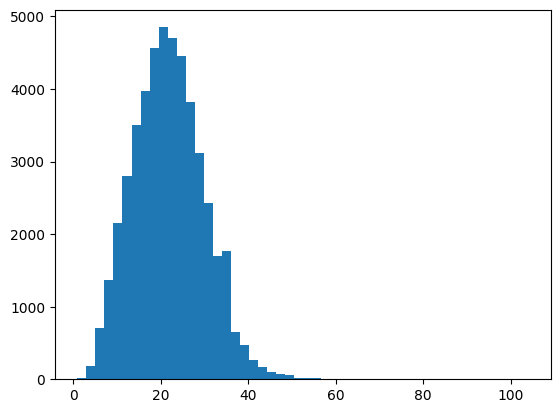

In [ ]:
print("M Gautham")
print("212221230027")
print("Length of each sentences")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
X1 = [[word2idx[w[0]] for w in s] for s in sentences]


In [ ]:
type(X1[0])


list

In [ ]:
X1[0]


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 10,
 16,
 2,
 17,
 18,
 19,
 20,
 21,
 22]

In [ ]:
max_len = 50


In [ ]:
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

In [ ]:
X[0]


array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    10,    16,     2,
          17,    18,    19,    20,    21,    22, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177], dtype=int32)

In [ ]:
y1 = [[tag2idx[w[2]] for w in s] for s in sentences]


In [ ]:
y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=1)

In [ ]:
X_train[0]


array([  346,    10,  1561,     2, 33814,    94,  1095, 33815, 11675,
          94,  1791,  1792,    14,   905,   126,   127,   348,   357,
        1771,    60,    25,    14,   960,   986,    12,   978,    32,
         353,    22, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177, 35177,
       35177, 35177, 35177, 35177, 35177], dtype=int32)

In [ ]:
y_train[0]


array([0, 0, 0, 0, 1, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
input_word = layers.Input(shape=(max_len,))
embedding_layer=layers.Embedding(input_dim=num_words,output_dim=50,input_length=max_len)(input_word)
dropout_layer=layers.SpatialDropout1D(0.2)(embedding_layer)
bidirectional_lstm=layers.Bidirectional(
    layers.LSTM(units=100,return_sequences=True))(dropout_layer)
output=layers.TimeDistributed(
    layers.Dense(num_tags,activation="softmax"))(bidirectional_lstm)
ent_name = Model(input_word, output)

In [ ]:
ent_name.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            1758900   
                                                                 
 spatial_dropout1d (Spatial  (None, 50, 50)            0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 50, 200)           120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 50, 17)            3417      
 ributed)                                                        
                                                             

In [ ]:
ent_name.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = ent_name.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=8,
)

Epoch 1/8
1050/1050 [==============================] - 116s 105ms/step - loss: 0.1896 - accuracy: 0.9569 - val_loss: 0.0692 - val_accuracy: 0.9802
Epoch 2/8
1050/1050 [==============================] - 107s 102ms/step - loss: 0.0533 - accuracy: 0.9843 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 3/8
1050/1050 [==============================] - 114s 109ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0506 - val_accuracy: 0.9852
Epoch 4/8
1050/1050 [==============================] - 108s 103ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0490 - val_accuracy: 0.9857
Epoch 5/8
1050/1050 [==============================] - 112s 107ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 6/8
1050/1050 [==============================] - 105s 100ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0529 - val_accuracy: 0.9856
Epoch 7/8
1050/1050 [==============================] - 108s 103ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0

In [ ]:
metrics = pd.DataFrame(ent_name.history.history)
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.189606,0.956858,0.069236,0.980242
1,0.053296,0.984290,0.052545,0.984387
2,0.038511,0.988265,0.050575,0.985164
3,0.031671,0.990140,0.049019,0.985671
4,0.027147,0.991353,0.050248,0.985641


M gautham
212221230027
Accuracy VS validation accuracy


<Axes: >

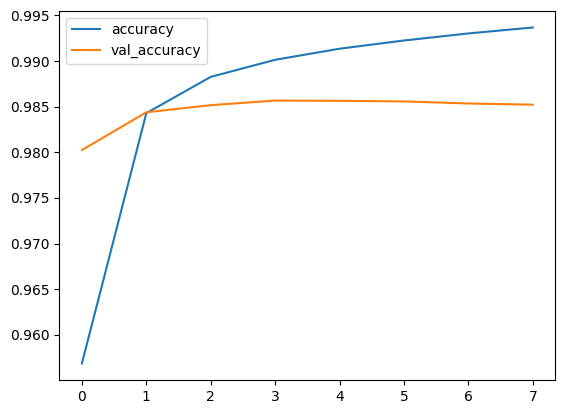

In [ ]:
print("M gautham")
print("212221230027")
print("Accuracy VS validation accuracy")
metrics[['accuracy','val_accuracy']].plot()

Loss VS Validation loss


<Axes: >

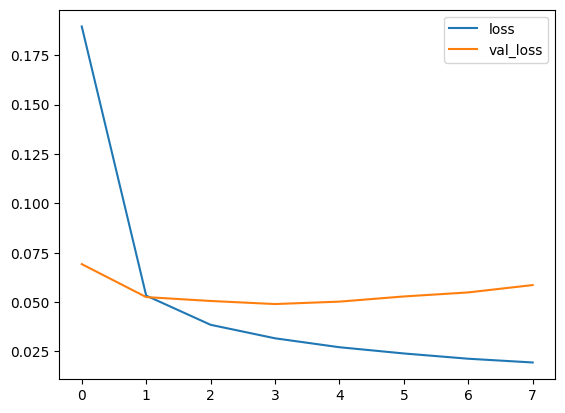

In [ ]:
print("Loss VS Validation loss")
metrics[['loss','val_loss']].plot()

In [ ]:
i = 30
p = ent_name.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("=" *40)
print("=" *40)
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *40)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 [==============================] - 1s 820ms/step
Word           True 	 Pred

----------------------------------------
The            B-org	O
African        I-org	B-geo
Union          I-org	I-org
's             O	O
peace          O	O
and            O	O
security       O	O
council        O	O
has            O	O
called         O	O
on             O	O
all            O	O
African        B-gpe	B-gpe
countries      O	O
to             O	O
impose         O	O
sanctions      O	O
against        O	O
Togo           B-geo	B-geo
over           O	O
the            O	O
military       O	O
's             O	O
installation   O	O
of             O	O
President      B-per	B-per
Faure          I-per	I-per
Gnassingbe     I-per	I-per
.              O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
Bermel         O	O
B